In [20]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import re
df = pd.read_csv("../data/01_raw/en.openfoodfacts.org.products.tsv", sep="\t")
#df_sample = df.sample(n=10000, random_state=1)



/home/gio/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [21]:
df.shape

(356027, 163)

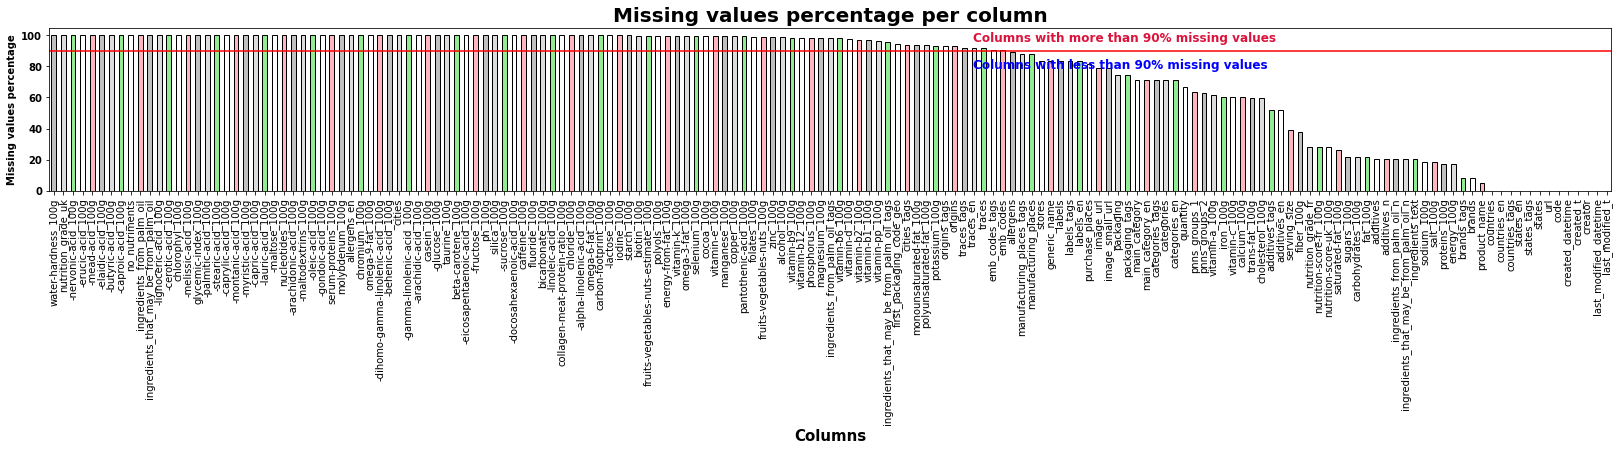

In [22]:
def msv1(data, thresh=20, color='black', edgecolor='black', width=15, height=3):

    plt.figure(figsize=(width,height))
    percentage=(data.isnull().mean())*100
    percentage.sort_values(ascending=False).plot.bar(color=color, edgecolor=edgecolor)
    plt.axhline(y=thresh, color='r', linestyle='-')
    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+12.5, 'Columns with more than %s%s missing values' %(thresh, '%'), fontsize=12,weight='bold', color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, 'Columns with less than %s%s missing values' %(thresh, '%'), fontsize=12,weight='bold', color='blue',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage', weight='bold')
    plt.yticks(weight ='bold')
    
    return plt.show()

msv1(df,90, color=('silver', 'gainsboro', 'lightgreen', 'white', 'lightpink'), width=28, height=3)


Retrait des colonnes 90% NA

In [23]:
df_0=df.dropna(thresh=1000, axis=1)

Rajout d'une colonne faisant partie des 90% NA mais qui peut s'averer utile

In [24]:
df_0 = df_0.assign(ingredients_that_may_be_from_palm_oil_tags=df["ingredients_that_may_be_from_palm_oil_tags"].values)

In [25]:

print("Après retrait des 90% NA : {} lignes, {} colonnes.".format(df_0.shape[0], df_0.shape[1]))

Après retrait des 90% NA : 356027 lignes, 96 colonnes.


In [26]:
df_0.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,selenium_100g,fruits-vegetables-nuts_100g,cocoa_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0
2,4559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,16087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,0.00514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0
4,16094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Sélection des entrées concernant uniquement en France

In [27]:
df_0["countries"] = df_0["countries"].apply(
    lambda x: "France" if re.match(r".*(fr).*", str(x), re.IGNORECASE) else x
)

In [28]:
df_1 = df_0[(df_0["countries"] == "France")]

print("Après séléctions lignes France: {} lignes, {} colonnes.".format(df_1.shape[0], df_1.shape[1]))

Après séléctions lignes France: 129323 lignes, 96 colonnes.


In [29]:
list(df_1.columns)

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_en',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'allergens',
 'traces',
 'traces_tags',
 'traces_en',
 'serving_size',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_en',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutrition_grade_fr',
 'pnns_groups_1',
 'pnns_groups_2',
 'states',
 'states_tags',
 'states_en',
 'main_category',
 'main_cat

In [30]:
df_2 = df_1[
    [
        'product_name',
        'brands',
        'categories',
        'ingredients_text',
        'allergens',
        'nutrition_grade_fr',
        'energy_100g',
        'fat_100g',
        'saturated-fat_100g',
        'carbohydrates_100g',
        'sugars_100g',
        'fiber_100g',
        'proteins_100g',
        'salt_100g'
    ]
]

In [31]:
df_2 = df_2[~df_2.product_name.isna()]


In [32]:
list(df_2.columns)

['product_name',
 'brands',
 'categories',
 'ingredients_text',
 'allergens',
 'nutrition_grade_fr',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g']

In [33]:
df_x = df_2[[
    'energy_100g',
    'fat_100g',
    'saturated-fat_100g',
    'carbohydrates_100g',
    'sugars_100g',
    'fiber_100g',
    'proteins_100g',
    'salt_100g',
    'sodium_100g'
]]

for i, col in enumerate(df_x.columns):
    plt.figure(i, figsize=(12,6))
    sns.boxplot(x=col, data=df_x)
    

KeyError: "['sodium_100g'] not in index"

In [34]:
cols=[
    'fat_100g',
    'carbohydrates_100g',
    'sugars_100g',
    'fiber_100g',
    'proteins_100g',
]

for col in cols:
    df_2 = df_2[df_2[col] <= 100]


In [ ]:

for i, col in enumerate(df_x.columns):
    plt.figure(i, figsize=(12,6))
    sns.boxplot(x=col, data=df_x)
    

In [36]:
df_2.max()

product_name           칠성사이다
energy_100g           6109.0
fat_100g               99.97
saturated-fat_100g      98.0
carbohydrates_100g      99.9
sugars_100g             99.9
fiber_100g              98.5
proteins_100g           90.0
salt_100g              100.0
dtype: object

In [42]:
cols =  [
    'energy_100g',
    'fat_100g',
    'saturated-fat_100g',
    'carbohydrates_100g',
    'sugars_100g',
    'fiber_100g',
    'proteins_100g',
    'salt_100g',
    'sodium_100g'
]
for col in cols:
    df_2[col] = df_2[col].fillna(0.0)

cols2 = [
    "categories",
    "ingredients_text",
    "allergens",
    "nutrition_grade_fr",
    "brands"
]
for col in cols2:
    df_2[col] = df_2[col].fillna("Non renseigné")

<AxesSubplot:>

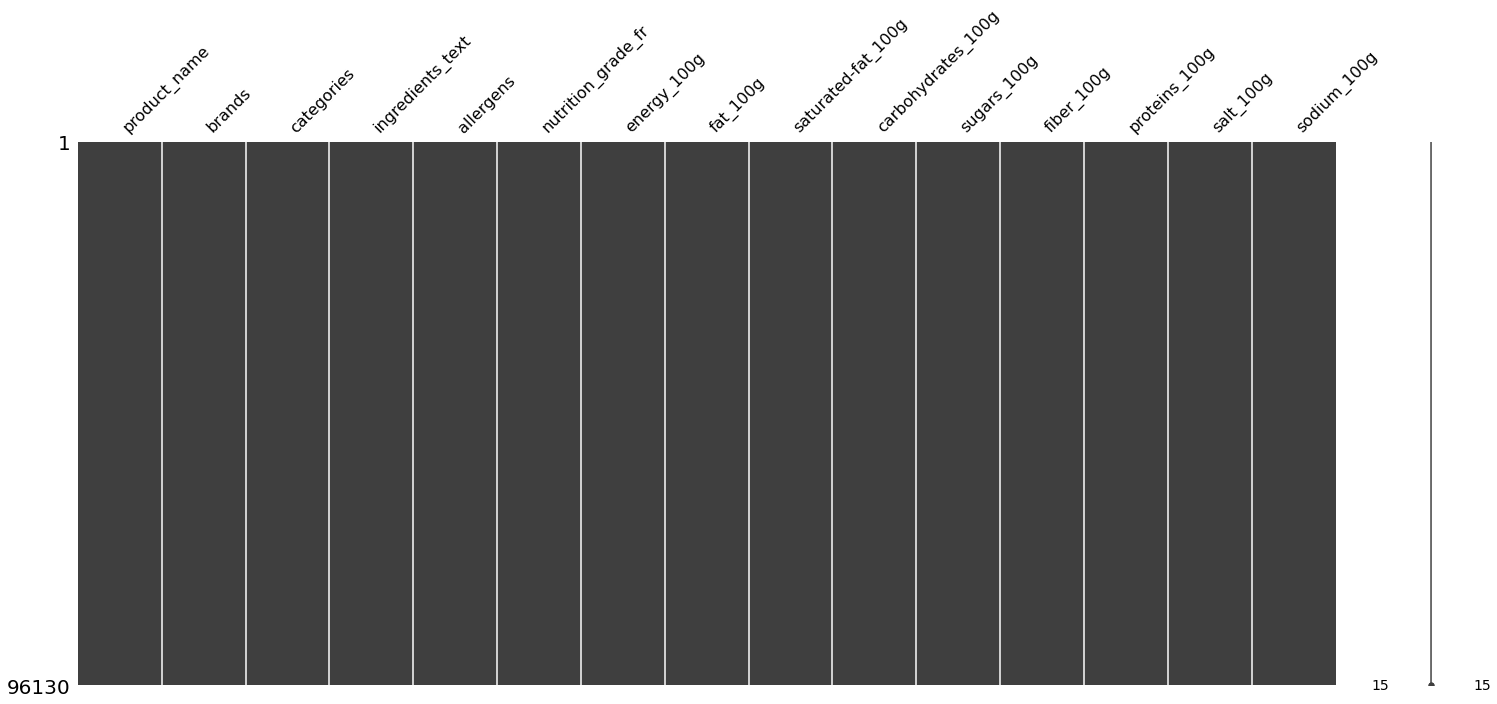

In [43]:
msno.matrix(df_2)

In [44]:
df_2.to_csv("data/02_intermediate/openfoodfacts_df_2.csv")